In [1]:
# This program computes the KMeans, KMedoids for k=2,3... and plot them

In [2]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# for medoids
# from sklearn_extra.cluster import KMedoids # no way to install
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer
from sklearn_extra.cluster import KMedoids
import time

%matplotlib inline

In [3]:
# Global variables
k = 2
colors = ['green', 'blue', 'orange', 'red', 'purple', 'yellow', 'cyan', 
          'black', 'pink', 'teal', 'aqua', 'maroon']
markers = ["o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d"]
dfs = []
df = pd.DataFrame()
file_name = 'rawdata1K.dat'

In [4]:
def pre_process_data():
    global df
    # Read csv file
    df = pd.read_csv(file_name, delim_whitespace=True)
    df.columns = ["X", "Y"]
    # Scale data
    scaler = MinMaxScaler()
    df.X = scaler.fit(df[['X']]).transform(df[['X']])
    df.Y = scaler.fit(df[['Y']]).transform(df[['Y']])
    # Check if any nulls
    df.isnull().sum()

In [5]:
def plot_data():
    plt.scatter(df.X, df.Y)
    plt.title('Scatter plot of X, Y')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.savefig('images/scatter-plot.png', dpi=300, bbox_inches='tight')
    plt.show()

In [6]:
def find_kmeans(k):
    start = time.time()
    global dfs
    dfs = []
    # Find kMeans
    k_means = KMeans(n_clusters=k)
    cluster = k_means.fit_predict(df[['X', 'Y']])
    df['cluster'] = cluster
    
    for i in range(0,k):
        dfs.append(df[df.cluster==i])
        
    end = time.time()
    print('KMeans time: ' , end-start)

In [7]:
def plot_clusters(k, save_to_file=True):
    # Plot it
    for i in range(0, len(dfs)):
        plt.scatter(dfs[i].X, dfs[i].Y, color=colors[i], marker='*', label='cluster ' + str(i))
    
    plt.title('Scatter plot of X, Y using K Means with K='+str(k))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    
    if save_to_file:
        plt.savefig('images/scatter-plot-kmeans-scaled-k-'+str(k)+'.png', dpi=300, bbox_inches='tight')
        
    plt.show()


In [8]:
def find_elbow(max_k):
    # Elbow plot method - find best k value
    # For capturing the execution time 
    start = time.time()
    k_list = range(1, max_k)
    sse = []

    for k_i in k_list:
        k_means = KMeans(n_clusters=k_i)
        k_means.fit(df[['X', 'Y']])
        sse.append(k_means.inertia_)

    end= time.time()
    print('Elbow plot time: ', end - start)
    print('Sum of squared errors: ', sse)
    
    # Plot it
    plt.title('Elbow plot to find best K based on SSE')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.plot(k_list, sse)

    plt.savefig('images/elbow-kmeans-scaled.png', dpi=300, bbox_inches='tight')
    plt.show()
    

In [9]:
def find_kmedoids(k):
    # K Medoids from pyclustering
    start = time.time()

    sample = df.values.tolist() # read_sample('./rawdata10K.dat')

    # find clusteroids
    clusteroids = []
    for i in range(0,k):
        clusteroids.append(i)


    k_medoids_instance = kmedoids(sample, clusteroids)
    k_medoids_instance.process()
    clusters = k_medoids_instance.get_clusters()
    medoids = k_medoids_instance.get_medoids()
    end = time.time()

    print('KMedoids time: ', end-start)
    print(medoids)
    
    # Display clusters.
    visualizer = cluster_visualizer()
    visualizer.set_canvas_title('KMedoids clustering with K='+str(k))
    visualizer.append_clusters(clusters, sample)
    visualizer.show()

    #visualizer.show(display = True)
    #plt.show()
    #plt.savefig('images/scatter-plot-kmedoids-scaled-k-'+str(k)+'.png', dpi=300, bbox_inches='tight')


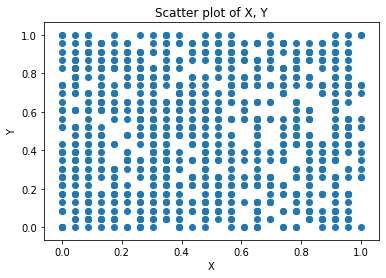

Elbow plot time:  0.2461988925933838
Sum of squared errors:  [175.9784616491963, 108.09491041374352, 68.26849499933351, 42.864112688075636, 35.95333164598331, 29.738955757885293]


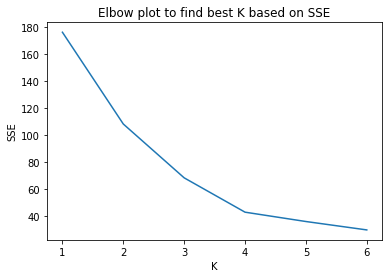

KMeans time:  0.04433107376098633


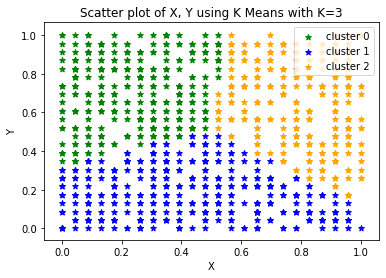

KMedoids time:  0.0247499942779541
[61, 883, 941]


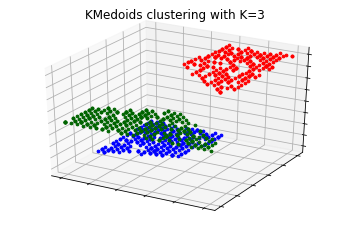

In [10]:
# 1 - Preprocess data
pre_process_data()

# 2 - Plot all data
plot_data()

# 3 - Find elbow to guess bet k
find_elbow(7)

# 4 - find kmeans
k = 3
find_kmeans(k)

# 5 - plot it
plot_clusters(k)

# 6 - find kmedoids
find_kmedoids(k)

In [ ]:
# Using kmedoids from sklearn-extra
/
"""


# Visualize medoids using plot

dfs = []
for i in range(0,k):
    dfs.append(df[df.index.isin(clusters[i])])
    
    
    
# Plot it
for i in range(0,k):
    plt.scatter(dfs[i].X, dfs[i].Y, color=colors[i], marker='*', label='cluster ' + str(i))
    
plt.title('Scatter plot of scaled X, Y using K Medoids with K='+str(k))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.savefig('images/scatter-plot-kmedoids-scaled-k-'+str(k)+'.png', dpi=300, bbox_inches='tight')
plt.show()





xx = df[['X', 'Y']].values.tolist()
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(xx)
df['cluster'] = kmedoids.labels_

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster ==2]

plt.scatter(df1.X, df1.Y, color='blue', marker='*', label='cluster 1')
plt.scatter(df2.X, df2.Y, color='orange', marker='+', label='cluster 2')
plt.scatter(df3.X, df3.Y, color='green', marker='o', label='cluster 3')
plt.title('Scatter plot of scaled X, Y using K Medoids - lib : sklearn-extra')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
"""
/